<a href="https://colab.research.google.com/github/Hamza-Chekireb/Artificial-Intelligence-Data-Science-Data-Analysis-Portfolio/blob/main/Classification_CNN_with_many_optimizers_Happy_house_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, InputLayer, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [ ]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


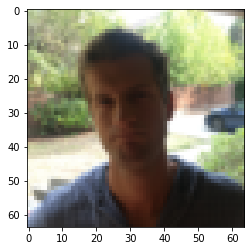

In [ ]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [ ]:
model = Sequential([
    InputLayer(input_shape=(64,64,3)),
    Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same'),
    BatchNormalization(axis=3),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 1)                 32769     
                                                                 
Total params: 33,793
Trainable params: 33,729
Non-trai

**Predict using SGD optimizer**

Epoch 1/5
19/19 [==============================] - 0s 5ms/step - loss: 21.0322 - accuracy: 0.4750
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 9.5721 - accuracy: 0.5800
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 1.6506 - accuracy: 0.8283
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 1.5541 - accuracy: 0.8183
Epoch 5/5
5/5 [==============================] - 0s 4ms/step - loss: 0.3913 - accuracy: 0.7933
Test loss: 0.39125263690948486
Test accuracy: 0.7933333516120911


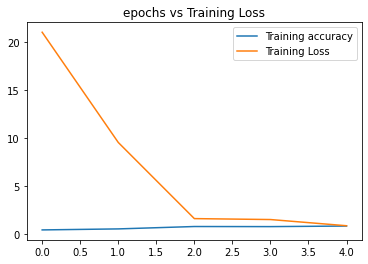

In [ ]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=["accuracy"])
history_model = model.fit(X_train,Y_train,epochs=5,batch_size=32)

# Evaluate Test set
results = model.evaluate(X_test, Y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']
count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

**Predict using RMprop optimizer**

Epoch 1/5
19/19 [==============================] - 1s 5ms/step - loss: 4.1665 - accuracy: 0.6167
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.7883 - accuracy: 0.8417
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 0.4515 - accuracy: 0.8967
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 0.7224 - accuracy: 0.8683
Epoch 5/5
5/5 [==============================] - 0s 4ms/step - loss: 0.4154 - accuracy: 0.7867
Test loss: 0.4154388904571533
Test accuracy: 0.7866666913032532


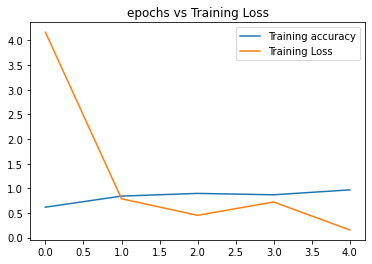

In [ ]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=["accuracy"])
history_model = model.fit(X_train,Y_train,epochs=5,batch_size=32)

# Evaluate Test set
results = model.evaluate(X_test, Y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']
count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

**Predict using Adagrad optimizer**

Epoch 1/5
19/19 [==============================] - 1s 5ms/step - loss: 1.1510 - accuracy: 0.6300
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.3149 - accuracy: 0.8767
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 0.2317 - accuracy: 0.9267
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 0.2120 - accuracy: 0.9333
Epoch 5/5
5/5 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.7667
Test loss: 0.5579310655593872
Test accuracy: 0.7666666507720947


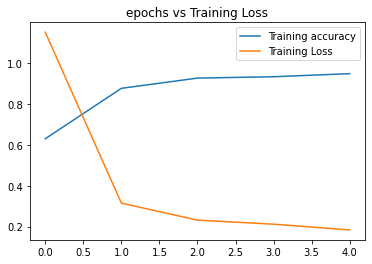

In [ ]:
model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=["accuracy"])
history_model = model.fit(X_train,Y_train,epochs=5,batch_size=32)

# Evaluate Test set
results = model.evaluate(X_test, Y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']
count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

**Predict using Adam optimizer**

In [ ]:
# Adadelta Adam RMSprop SGD Adagrad Adamax Nadam Ftrl
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
history_model = model.fit(X_train,Y_train,epochs=5,batch_size=32)

Epoch 1/5
19/19 [==============================] - 1s 5ms/step - loss: 1.4313 - accuracy: 0.6917
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.3764 - accuracy: 0.8833
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 0.1149 - accuracy: 0.9600
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 0.0768 - accuracy: 0.9700
Epoch 5/5
19/19 [==============================] - 0s 5ms/step - loss: 0.0821 - accuracy: 0.9750


# Evaluate / Test

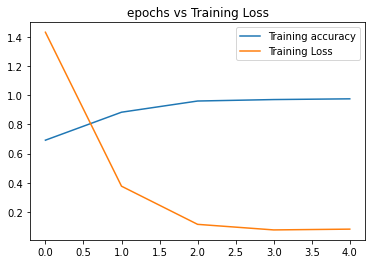

In [ ]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']
count = range(len(train_accuracy))

plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [ ]:
# Evaluate Test set
results = model.evaluate(X_test, Y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

5/5 [==============================] - 0s 5ms/step - loss: 0.3967 - accuracy: 0.8933
Test loss: 0.3966965079307556
Test accuracy: 0.8933333158493042


Confusion Matrix

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        66
           1       0.99      0.82      0.90        84

    accuracy                           0.89       150
   macro avg       0.90      0.90      0.89       150
weighted avg       0.91      0.89      0.89       150



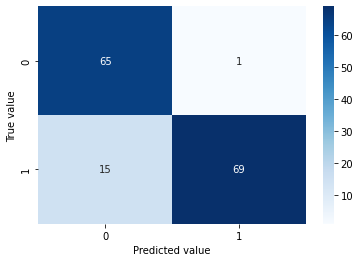

In [ ]:
# Getting of predict from model
predict = (model.predict(X_test)> 0.5).astype("int32")

from sklearn.metrics import classification_report
print(classification_report(Y_test,predict))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

# Comparaison:
In the comparison of SGD, RMSprop, Adagrad and Adam Optimizers, Adam got highest accuracy.

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


# Displaying predicted images with tested images

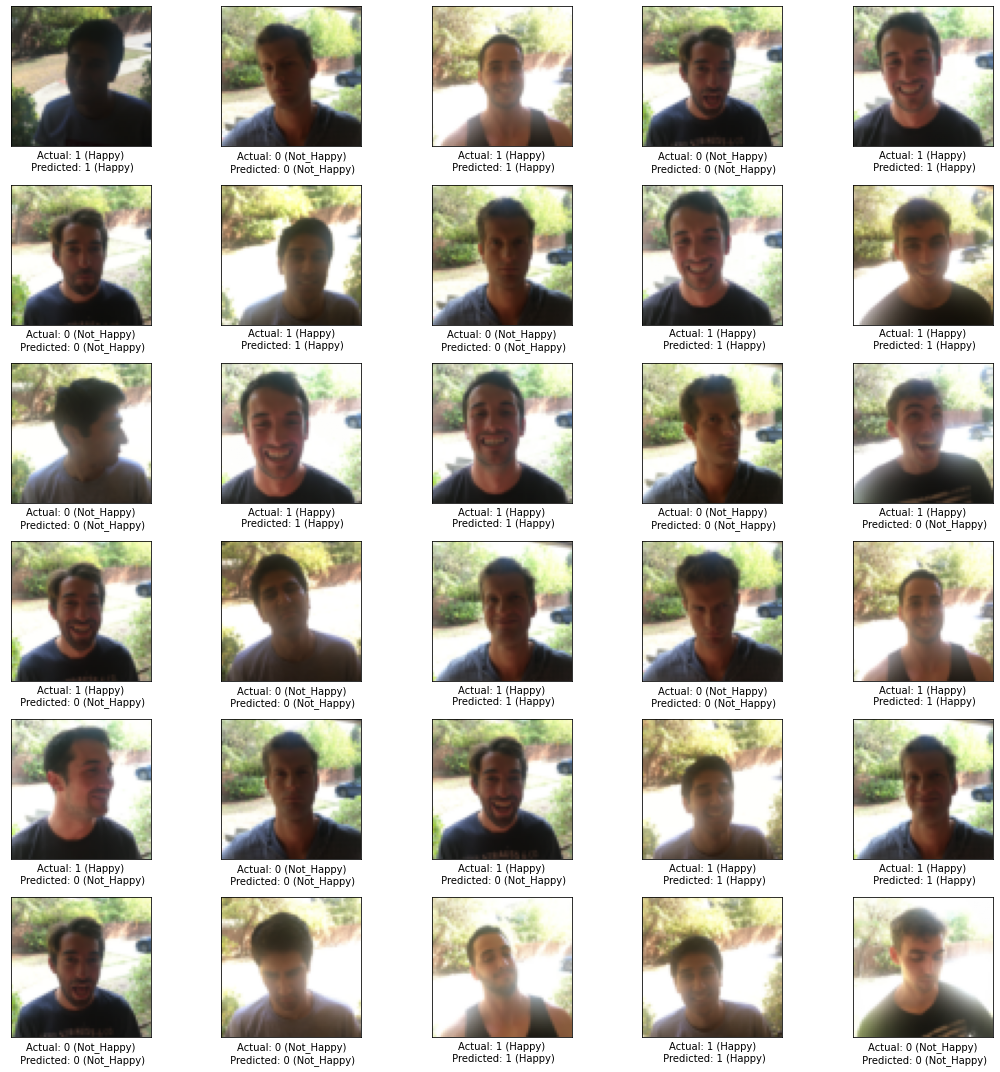

In [ ]:
txt_labels = ['Not_Happy','Happy']
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    image_dis = np.random.randint(0, 150)
    plt.imshow(X_test[image_dis], cmap=plt.cm.gray)

    Y_test_img = int(Y_test[image_dis])
    predicted_img = int(predict[image_dis])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        Y_test_img, txt_labels[Y_test_img], predicted_img, txt_labels[predicted_img]
    ))
    
plt.tight_layout()
plt.show()